In [ ]:
import pandas as pd
from matplotlib import pyplot as pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

**Задание     
Цель: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений**

**Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA**


**1. Получите данные и загрузите их в рабочую среду**

In [ ]:
glass = pd.read_csv('glass.csv') #считываем данные из файла
glass.head() #посмотреть что считалось

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**2. Проведите первичный анализ.  
а) Проверьте количество записей для каждого класса. Сделайте вывод**

In [ ]:
glass.info() #общая информация по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Все данные в числовой форме, пропусков нет.

In [ ]:
glass.Type.value_counts() #посмотреть кол-во классов и количество единиц в классе

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


Всего 7 классов, самый малочисленный класс - 6-й.     
**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']], glass['Type'], test_size = 0.2, random_state = 42)

**4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.    
Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели.**

In [ ]:
rfc = RandomForestClassifier(random_state = 42) #инициализируем модель случайного леса. По умолчанию 100 деревьев

In [ ]:
rfc.fit(X_train, y_train) #Обучаем модель на обучающей выборке

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test) #предсказание целевой переменной для тестовой выборки

In [ ]:
rfc.score(X_test, y_test) #метрика точности модели

0.8372093023255814

**5. Обработайте выбросы в данных.    
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?**


In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


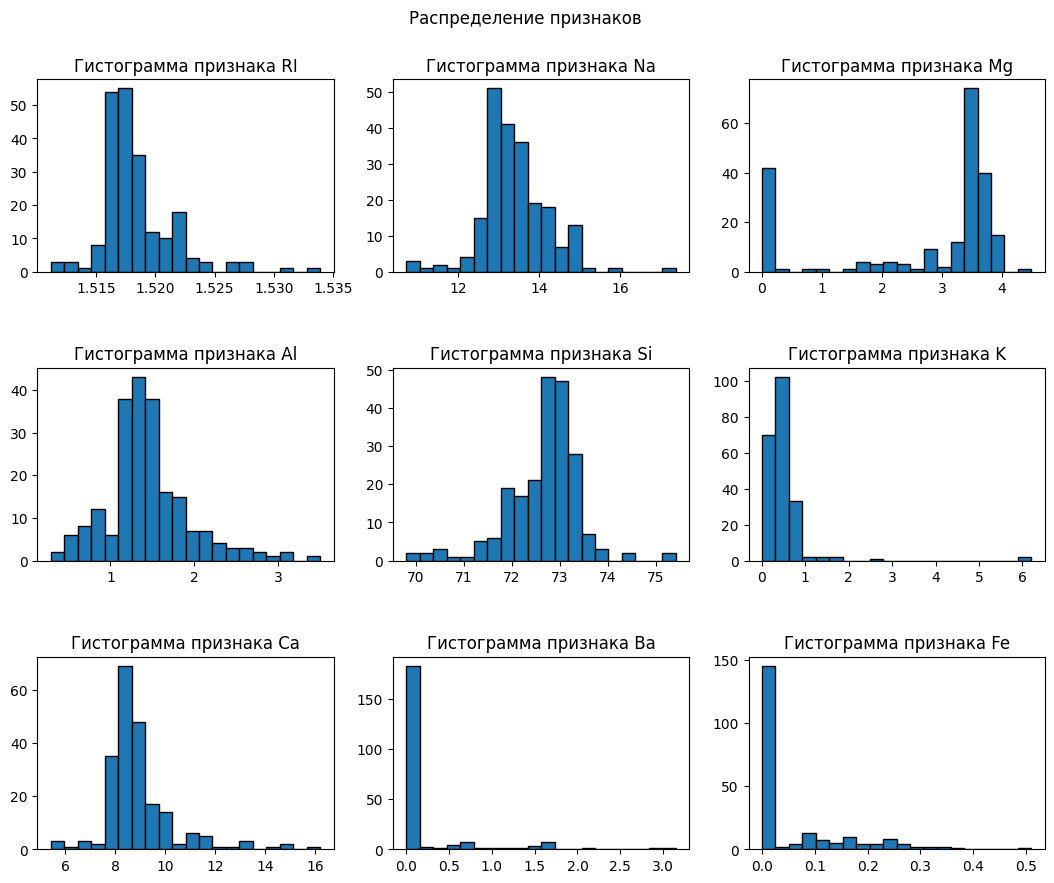

In [ ]:
plt.figure(figsize = (13, 10)) #задаем общий размер рисунка
plt.subplots_adjust(hspace = 0.5) #задаем зазор между графиками
plt.suptitle('Распределение признаков', fontsize = 12, y = 0.95)

for i, f in enumerate(glass.columns[:-1]): #перебираем все признаки
  ax = plt.subplot(3, 3, i+1)
  plt.hist(glass[f], bins = 20, edgecolor = 'black') #печатаем гистограмму текущего признака

  plt.title(f'Гистограмма признака {f}')
  plt.ylabel('')

Распределение признаков RI, Na, Ca, Si похоже на нормальное.

**b) Исследуйте признаки на выбросы несколькими способами.    
Посмотрю наличие выбросов в каждом признаке при помощи ящика с усами.

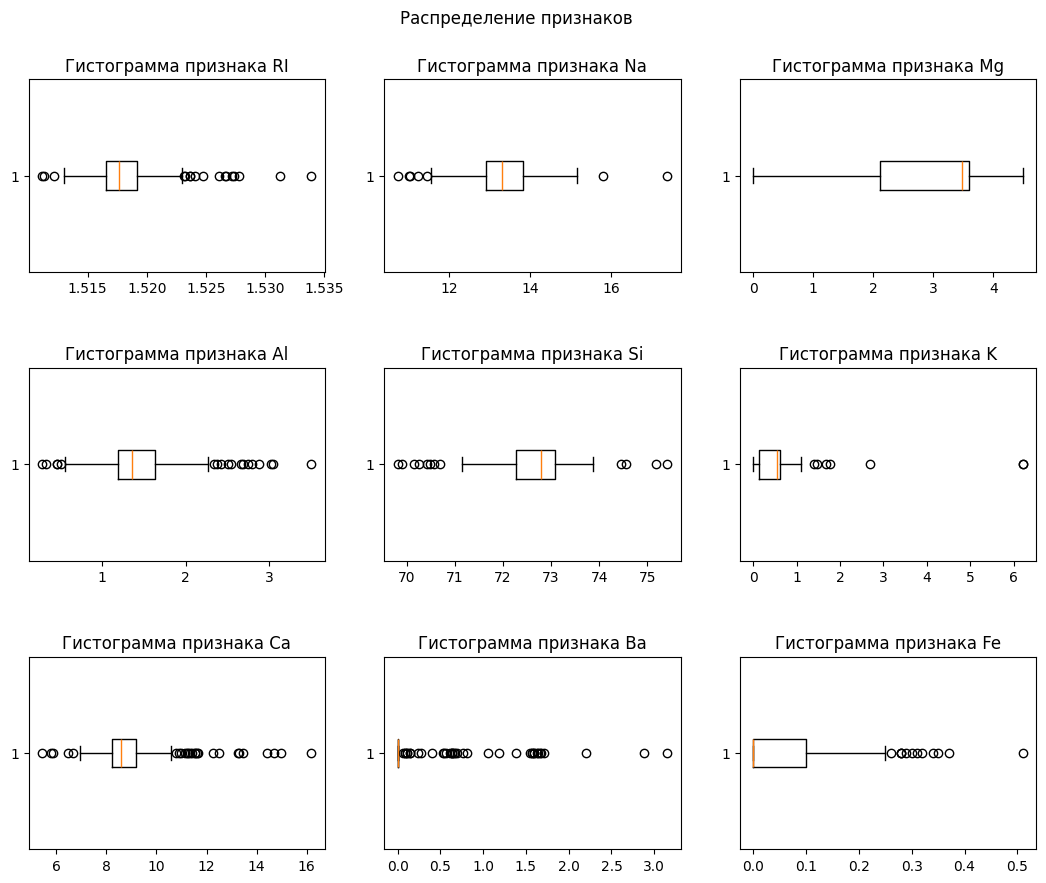

In [ ]:
plt.figure(figsize = (13, 10)) #задаем общий размер рисунка
plt.subplots_adjust(hspace = 0.5) #задаем зазор между графиками
plt.suptitle('Распределение признаков', fontsize = 12, y = 0.95)

for i, f in enumerate(glass.columns[:-1]): #перебираем все признаки
  ax = plt.subplot(3, 3, i+1)
  plt.boxplot(glass[f], orientation = 'horizontal') #печатаем ящик текущего признака

  plt.title(f'Гистограмма признака {f}')
  plt.ylabel('')

Судя по гистограмме и ящикам в признаках Fe, Ba, Al, K, Na есть выбросы.Но так можно определить вероятность выброса только по одному признаку. При этом не учитывается влияние остальных признаков.  
Проверим наличие выбросов по с учетом всех признаков.     
**Метод OneClassSVM**

In [ ]:
X = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].copy() #массив параметров модели

In [ ]:
ocsvm = OneClassSVM(kernel = 'rbf', nu = 0.1) #инициализируем модель

In [ ]:
ocsvm.fit(X) #обучаю модель на входных данных

OneClassSVM(nu=0.1)

In [ ]:
glass['OCSVM'] = ocsvm.predict(X) # прибавляю к исходному датасету столбец с предсказанием модели о наличие выброса (-1 - выброс, 1 - нет)

In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,OCSVM
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,-1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


**Изолирующий лес**

In [ ]:
ifor = IsolationForest() #Инициализирую модель

In [ ]:
ifor.fit(X) #обучаю на исходных данных

IsolationForest()

In [ ]:
glass['ifor'] = ifor.predict(X)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,OCSVM,ifor
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,-1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1,1


**EllipticEnvelope**

In [ ]:
ee = EllipticEnvelope(contamination=0.2)

In [ ]:
ee.fit(X)

EllipticEnvelope(contamination=0.2)

In [ ]:
glass['EllipticEnvelope'] = ee.predict(X) #записываю предсказание модели -1 - выброс

In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,OCSVM,ifor,EllipticEnvelope
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,-1,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1,1,1


In [ ]:
#заменила -1 на 0 чтобы удобнее было подсчитывать голоса моделей
glass.loc[ glass['OCSVM'] == -1,'OCSVM'] = 0
glass.loc[ glass['ifor'] == -1,'ifor'] = 0
glass.loc[ glass['EllipticEnvelope'] == -1,'EllipticEnvelope'] = 0

In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,OCSVM,ifor,EllipticEnvelope
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1,1,1


Имеем определение выбросов от 3-х моделей.
Если 2 модели сказали, что это выброс - то будем считать, что так и есть и не используем эту строку.    
Т.е. если OCSVM	+ ifor +	EllipticEnvelope < 2, то это выброс => не берем эту строку.

In [ ]:
glass_clear = glass[(glass.OCSVM + glass.ifor + glass.EllipticEnvelope) >= 2].copy() #копируем только строки без выбросов

In [ ]:
glass_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 213
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RI                196 non-null    float64
 1   Na                196 non-null    float64
 2   Mg                196 non-null    float64
 3   Al                196 non-null    float64
 4   Si                196 non-null    float64
 5   K                 196 non-null    float64
 6   Ca                196 non-null    float64
 7   Ba                196 non-null    float64
 8   Fe                196 non-null    float64
 9   Type              196 non-null    int64  
 10  OCSVM             196 non-null    int64  
 11  ifor              196 non-null    int64  
 12  EllipticEnvelope  196 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 21.4 KB


In [ ]:
#% удаленных записей
round((len(glass) - len(glass_clear))*100/len(glass), 2)

8.41

Построю еще раз гистограммы чтобы посмотреть визуально по признакам

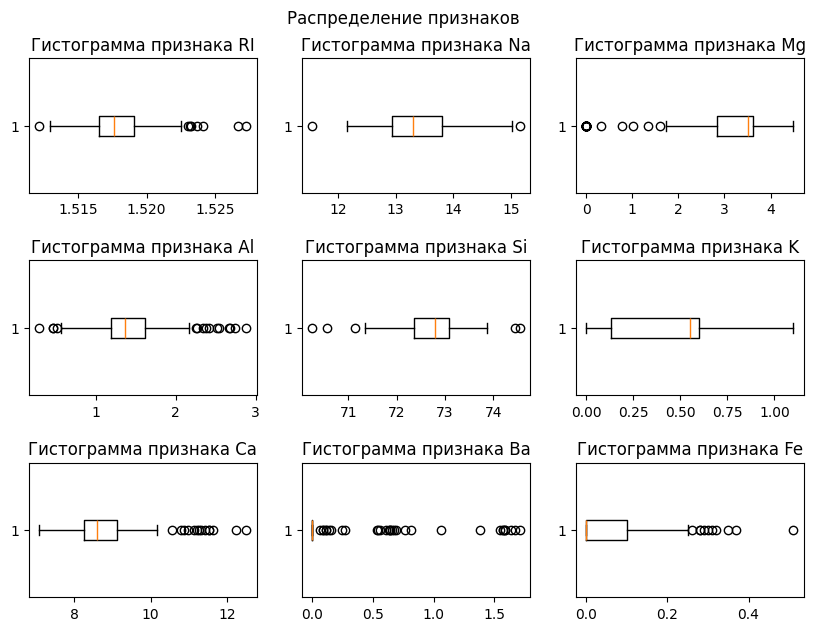

In [ ]:
plt.figure(figsize = (10, 7)) #задаем общий размер рисунка
plt.subplots_adjust(hspace = 0.5) #задаем зазор между графиками
plt.suptitle('Распределение признаков', fontsize = 12, y = 0.95)

for i, f in enumerate(glass_clear.columns[:-4]): #перебираем все признаки
  ax = plt.subplot(3, 3, i+1)
  plt.boxplot(glass_clear[f],orientation = 'horizontal') #печатаем ящик текущего признака

  plt.title(f'Гистограмма признака {f}')
  plt.ylabel('')

В результате чистки от выбросов по совокупности признаков все равно по каждому признаку в отдельности похоже, что есть выбросы.     
**6. Повторите п. 4**

In [ ]:
#разбиваем данные без выбросов на обучающую и тренировочную выборки
Xc_train, Xc_test, yc_train, yc_test = train_test_split(glass_clear[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']], glass_clear['Type'], test_size = 0.2, random_state = 42)

In [ ]:
rfc_c = RandomForestClassifier(random_state = 42)

In [ ]:
rfc_c.fit(Xc_train, yc_train) #обучение модели

RandomForestClassifier(random_state=42)

In [ ]:
rfc_c.score(Xc_test, yc_test) #метрика точности модели без выбросов

0.7

Метрика стала хуже.     
Попробую выкинуть только те данные, где все 3 модели сказали, что это выброс.

In [ ]:
glass3 = glass[(glass.OCSVM + glass.ifor + glass.EllipticEnvelope) == 3].copy() #копируем только строки без выбросов по версии 3-х моделей

In [ ]:
glass3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 1 to 187
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RI                160 non-null    float64
 1   Na                160 non-null    float64
 2   Mg                160 non-null    float64
 3   Al                160 non-null    float64
 4   Si                160 non-null    float64
 5   K                 160 non-null    float64
 6   Ca                160 non-null    float64
 7   Ba                160 non-null    float64
 8   Fe                160 non-null    float64
 9   Type              160 non-null    int64  
 10  OCSVM             160 non-null    int64  
 11  ifor              160 non-null    int64  
 12  EllipticEnvelope  160 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 17.5 KB


In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(glass3[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']], glass3['Type'], test_size = 0.2, random_state = 42)

In [ ]:
rfc3 = RandomForestClassifier(random_state = 42)

In [ ]:
rfc3.fit(X3_train, y3_train)

RandomForestClassifier(random_state=42)

In [ ]:
rfc3.score(X3_test, y3_test)

0.75

In [ ]:
# метрика на исходных даных (без чистки)
rfc.score(X_test, y_test)

0.8372093023255814

**Сформулируйте выводы по проделанной работе.      
а) Кратко опишите, какие преобразования были сделаны с данными**    
Исходные данные были проверены на наличие выбросов методами OneClassSVM, Изолирующмй лес и EllipticEnvelope.
На основе предсказаний, сделанных тремя моделями было сформировано 2 датасета - с исключением значений где точка была определена как выброс 2-мя моделями и всеми 3-мя моделями.    
Выполнено обучение модели классификации на двух сформированных наборах данных (с разделением на обучающую и тренировочную выборки).
б)В итоге получены метрики точности на тестовых данных:
Исходный набор (без удаления) - 0,837,    
Набор с удалением точек по предсказаниям 2-х моделей - 0,7,       
набор с удалением точек по предсканиям 3-х моделй - 0,75.       
с) Выводы:     
Визуально если посмотреть на распределения, складывается впечптление, что это такой разброс данных и, возможно, не все удаленные строки были выбросами, а это нормальные значения. Поэтому, при их удалении метрика снизилась. Перед тем как огульно удалять строчки надо разобраться в сути данных.  
К примеру, попробую менять параметр contamination = 0,2 в модели EllipticEnvelope и посмотрю как меняется точность.

% удаленных записей - 10.28
% удаленных записей - 20.09
% удаленных записей - 29.91
% удаленных записей - 40.19


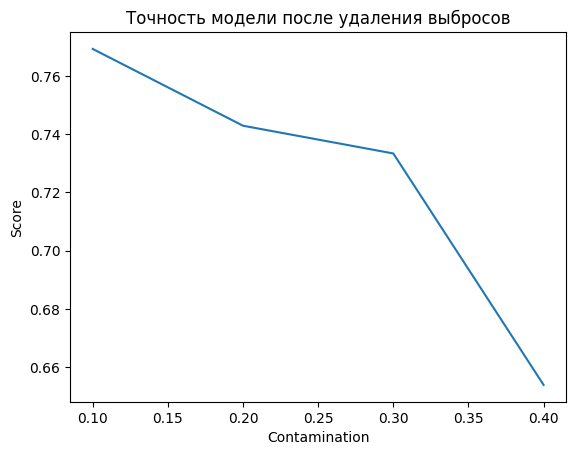

In [ ]:
glass_c = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']].copy() #создаю копию исходных данных
scor = [] #создаю пустой список, в который буду записывать вычисленные оценки
for c in np.arange(0.1, 0.5, 0.1): #с-параметр доли загрязненных данных в модели EllipticEnvelope

  ee = EllipticEnvelope(contamination = c, random_state = 42) #инициализируем модель с текущим параметром с
  ee.fit(X) #обучаем на параметрах
  glass_c['EE'] = ee.predict(X) #записываю предсказание модели -1 - выброс, "1" -норм значение. Х - исходный набор параметров - см.выше

  glass_clr = glass_c[ glass_c['EE'] == 1 ].copy() # оставляю только те строки, где модель сказала, что это не выброс

  print(f'% удаленных записей - {round((len(glass) - len(glass_clr))*100/len(glass), 2)}')

  #разбиваю очищенные данные на тестовую и обучающую выборки
  Xce_train, Xce_test, yce_train, yce_test = train_test_split(glass_clr[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']], glass_clr['Type'], test_size = 0.2, random_state = 42)

  rfc_e = RandomForestClassifier(random_state = 42) #обучаю ту же модель на полученных данных

  rfc_e.fit(Xce_train, yce_train) #обучение модели

  scor.append(rfc_e.score(Xce_test, yce_test)) #запоминаю полученную точность

plt.plot(np.arange(0.1, 0.5, 0.1), scor)
plt.title('Точность модели после удаления выбросов')
plt.xlabel('Сontamination')
plt.ylabel('Score')
plt.show()

Из полученных данных видно, что с удалением точек точность модели падает.    
Возможно, это и не выбросы, а нормальная вариация параметров.    